# Drift Time - Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import time
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from DriftTime import DriftTime

In [3]:
RUNNUMBER = 1252
INPUT_PATH = '/lustre/cmswork/nlai/DATA/raw_data/'
OUTPUT_PATH = '/lustre/cmswork/nlai/DATA/drift_distributions/'
N_TRIGGER = 500
L_BOUND = -400
R_BOUND = 900

In [4]:
OFFSET_DETECTOR = 100

In [5]:
drift_instance = DriftTime(RUNNUMBER, INPUT_PATH, OUTPUT_PATH)

In [6]:
drift_instance.read_data()


Reading data from RUN001252_data.txt ... 
Data imported successfully


In [7]:
drift_instance.stream

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,2,1,31,155532,1950,29.0
1,2,1,43,155542,3285,17.0
2,2,1,45,155542,3286,8.0
3,2,0,88,155542,3288,24.0
4,2,1,126,155542,3286,14.0
...,...,...,...,...,...,...
140780482,2,0,48,807221825,3480,15.0
140780483,2,0,108,807221825,3476,30.0
140780484,2,0,49,807221825,3478,14.0
140780485,2,0,109,807221825,3479,21.0


In [8]:
drift_instance.compute_time()


Converting time features in nanoseconds...
Conversion completed


In [9]:
drift_instance.stream

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,2,1,31,155532,1950,29.0,1.385795e+10
1,2,1,43,155542,3285,17.0,1.385887e+10
2,2,1,45,155542,3286,8.0,1.385887e+10
3,2,0,88,155542,3288,24.0,1.385887e+10
4,2,1,126,155542,3286,14.0,1.385887e+10
...,...,...,...,...,...,...,...
140780482,2,0,48,807221825,3480,15.0,7.192346e+13
140780483,2,0,108,807221825,3476,30.0,7.192346e+13
140780484,2,0,49,807221825,3478,14.0,7.192346e+13
140780485,2,0,109,807221825,3479,21.0,7.192346e+13


In [10]:
# drift_instance.select_data()
# drift_instance.select_trigger(n=100)

data = drift_instance.stream

data = data.drop(data[(data['FPGA']==0) & (data['TDC_CHANNEL']==128)].index)
data['IS_TRIG'] = np.where((data['FPGA']==1) & (data['TDC_CHANNEL']==128), 1, 0)

In [11]:
# drift_instance.trig

trig_number = data['IS_TRIG'].sum()
data_number = len(data) - trig_number

print(f'Number of trigger events: {trig_number}')
print(f'Number of non-trigger events: {data_number}')

Number of trigger events: 164673
Number of non-trigger events: 140615814


In [12]:
small_data = data[:10000]

In [13]:
small_data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG
0,2,1,31,155532,1950,29.0,1.385795e+10,0
1,2,1,43,155542,3285,17.0,1.385887e+10,0
2,2,1,45,155542,3286,8.0,1.385887e+10,0
3,2,0,88,155542,3288,24.0,1.385887e+10,0
4,2,1,126,155542,3286,14.0,1.385887e+10,0
...,...,...,...,...,...,...,...,...
9995,2,1,88,213384,1232,25.0,1.901255e+10,0
9996,2,0,126,213391,46,29.0,1.901314e+10,0
9997,2,0,62,213391,46,29.0,1.901314e+10,0
9998,2,0,127,213391,46,30.0,1.901314e+10,0


In [23]:
small_data[small_data['IS_TRIG']==1]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG
1127,2,1,128,161749,2050,6.0,1.441189e+10,1
1479,2,1,128,163652,383,4.0,1.458140e+10,1
1510,2,1,128,163819,2049,5.0,1.459632e+10,1
2696,2,1,128,170867,2566,7.0,1.522431e+10,1
2799,2,1,128,171611,2822,19.0,1.529061e+10,1
2848,2,1,128,171871,2533,5.0,1.531377e+10,1
4299,2,1,128,180083,3288,8.0,1.604548e+10,1
4748,2,1,128,183211,868,5.0,1.632412e+10,1
6357,2,1,128,193310,1467,9.0,1.722396e+10,1
7732,2,1,128,200895,2751,7.0,1.789981e+10,1


In [14]:
group_data = small_data.groupby(by=['ORBIT_CNT'])

In [16]:
# ciclo su tutti i raggruppamenti per ORBIT_CNT
final = pd.DataFrame()
for orb, frame in group_data:
    
    # SE nel gruppo c'è un trigger value
    if 1 in frame['IS_TRIG'].values and frame['IS_TRIG'].value_counts().loc[1]==1:
        # stampa l'orbita 
#         print(f'ORBIT_CNT: {orb}')
        # calcola la drift time 
        frame['DRIFT_TIME'] = frame['TIME'] - frame[frame['IS_TRIG']==1].iloc[0]['TIME']
        frame['DRIFT_TIME'].replace(0, np.nan, inplace=True)
        # stampa il gruppo
#         print(frame, end="\n\n")
    
    # SE nel gruppo non c'è il trigger value
    elif 1 not in frame['IS_TRIG'].values:
        frame['DRIFT_TIME'] = np.nan
#         print(frame, end="\n\n")
       
    final = final.append(frame)
        

In [17]:
final['IS_TRIG'].sum()

13

In [19]:
final

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG,DRIFT_TIME
0,2,1,31,155532,1950,29.0,1.385795e+10,0,NaN
1,2,1,43,155542,3285,17.0,1.385887e+10,0,NaN
2,2,1,45,155542,3286,8.0,1.385887e+10,0,NaN
3,2,0,88,155542,3288,24.0,1.385887e+10,0,NaN
4,2,1,126,155542,3286,14.0,1.385887e+10,0,NaN
...,...,...,...,...,...,...,...,...,...
9995,2,1,88,213384,1232,25.0,1.901255e+10,0,NaN
9996,2,0,126,213391,46,29.0,1.901314e+10,0,NaN
9997,2,0,62,213391,46,29.0,1.901314e+10,0,NaN
9998,2,0,127,213391,46,30.0,1.901314e+10,0,NaN


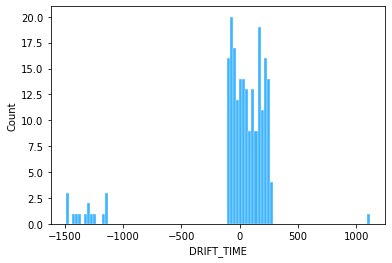

In [20]:
sns.histplot(x=final['DRIFT_TIME'],  bins=100, stat='count', element='bars', fill=True, color='#009cff', edgecolor='white')
plt.show()

In [25]:
shifted = drift_instance.shift_dt(final, 100)
cut_shifted = drift_instance.cut_dt(shifted, -400, 900)

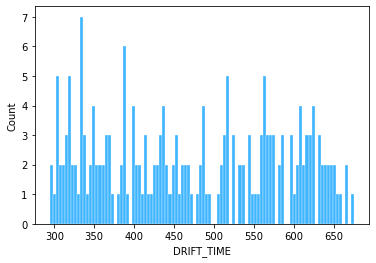

In [26]:
sns.histplot(x=cut_shifted['DRIFT_TIME'],  bins=100, stat='count', element='bars', fill=True, color='#009cff', edgecolor='white')
plt.show()

In [29]:
cut_shifted

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG,DRIFT_TIME
1125,2,0,25,161749,2046,2.0,1.441189e+10,0,296.666666
1126,2,1,14,161749,2046,16.0,1.441189e+10,0,308.333334
1128,2,0,82,161749,2050,22.0,1.441189e+10,0,413.333334
1129,2,1,111,161749,2046,22.0,1.441189e+10,0,313.333334
1130,2,0,24,161749,2050,28.0,1.441189e+10,0,418.333334
...,...,...,...,...,...,...,...,...,...
8919,2,0,89,207358,3193,15.0,1.847568e+10,0,607.500000
8920,2,1,92,207358,3189,22.0,1.847568e+10,0,513.333332
8921,2,0,17,207358,3193,25.0,1.847568e+10,0,615.833332
8922,2,1,39,207358,3193,20.0,1.847568e+10,0,611.666668


# --------------------------------------------------------------------------

In [ ]:
# df = drift_instance.compute_dt_dataframe()

In [ ]:
df

In [ ]:
df = drift_instance.cut_dt(df, L_BOUND, R_BOUND)

In [ ]:
df

In [ ]:
df = drift_instance.shift_dt(df, OFFSET_DETECTOR)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))

ax = sns.histplot(x=df['DRIFT_TIME'],  bins=100, stat='count', element='bars', fill=True, color='#009cff', edgecolor='white')

ax.set_xlim(L_BOUND, R_BOUND)

ax.set_title(f'Drift Time Distribution - RUN00{RUNNUMBER}', fontsize = 18)
ax.set_xlabel('Drift Time [ns]', fontsize = 16)
ax.set_ylabel('Counts', fontsize = 16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

fig.tight_layout()

plt.show()

In [7]:
input_path = '/lustre/cmswork/nlai/DATA/drift_distributions/'
input_fname = 'RUN001252_full_df_test_cut_shifted2.txt'

input_file = input_path+input_fname

df = pd.read_csv(input_file, sep=' ')

In [8]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG,DRIFT_TIME
0,2,0,25,161749,2046,2.0,1.441189e+10,0,-3.333334
1,2,1,14,161749,2046,16.0,1.441189e+10,0,8.333334
2,2,0,82,161749,2050,22.0,1.441189e+10,0,113.333334
3,2,1,111,161749,2046,22.0,1.441189e+10,0,13.333334
4,2,0,24,161749,2050,28.0,1.441189e+10,0,118.333334
...,...,...,...,...,...,...,...,...,...
196,2,0,89,207358,3193,15.0,1.847568e+10,0,307.500000
197,2,1,92,207358,3189,22.0,1.847568e+10,0,213.333332
198,2,0,17,207358,3193,25.0,1.847568e+10,0,315.833332
199,2,1,39,207358,3193,20.0,1.847568e+10,0,311.666668


In [9]:
df[df['IS_TRIG']==1]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,IS_TRIG,DRIFT_TIME


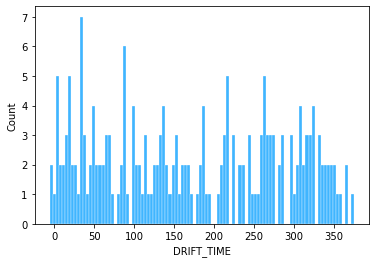

In [10]:
sns.histplot(x=df['DRIFT_TIME'],  bins=100, stat='count', element='bars', fill=True, color='#009cff', edgecolor='white')
plt.show()